#### Get y_list 

In [161]:
# Autoreload 
%load_ext autoreload
%autoreload 2

from pathlib import Path
from phosphosite.dataset import psp_filtered
psp_filtered

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,uniprot_id,mod_rsd,mod,site,res,pos
0,P31946,T2-p,p,T2,T,2
1,P31946,S6-p,p,S6,S,6
2,P31946,Y21-p,p,Y21,Y,21
3,P31946,T32-p,p,T32,T,32
4,P31946,S39-p,p,S39,S,39
...,...,...,...,...,...,...
239815,Q8IYH5,S474-p,p,S474,S,474
239816,Q8IYH5,S606-p,p,S606,S,606
239817,Q8IYH5,Y670-p,p,Y670,Y,670
239818,Q8IYH5,S677-p,p,S677,S,677


In [162]:
# TODO: 
# have a process that filters down this list to only phosphosites that MAP ON 
# to the uniprot_id (i.e. same localised Serine as in the sequence) 
# use the same uniprot_id sequences as the embeddings and whatever the alphafold structures
# will have. 

In [163]:
from phosphosite.dataset.psp import load_psp_alternate
psp = load_psp_alternate(
    include_columns=["uniprot_id", "res", "pos", ]
)
psp

,uniprot_id,res,pos
0,P31946,T,2
1,P31946,S,6
2,P31946,Y,21
3,P31946,T,32
4,P31946,S,39
...,...,...,...
239815,Q8IYH5,S,474
239816,Q8IYH5,S,606
239817,Q8IYH5,Y,670
239818,Q8IYH5,S,677


In [164]:
psp.res.value_counts()

S    141756
T     58714
Y     39350
Name: res, dtype: int64

In [165]:
# Order by uniprot_id 
psp = psp.sort_values(by=["uniprot_id", "res", "pos"])
psp

,uniprot_id,res,pos
26255,A0A024R4G9,S,16
26256,A0A024R4G9,S,20
26254,A0A024R4G9,T,14
156759,A0A075B759,S,40
156761,A0A075B759,T,93
...,...,...,...
111988,Q9Y6Y9,Y,131
43374,Q9Y6Z7,S,141
43375,Q9Y6Z7,T,155
64576,Q9YNA8,S,465


### TODO: filter all sites here by whether their (pos, res) maps to the correct residue using the available uniprot sequence.

This will exclude all sites that do not map correctly.

In [166]:
# subtract 1 from pos to get index. 
psp["index"] = psp["pos"] - 1

In [167]:
# group by uniprot_id to get the list of phosphosites for each uniprot_id (positions)
psp = psp.groupby("uniprot_id").agg(list)
psp

,res,pos,index
uniprot_id,,,
A0A024R4G9,"[S, S, T]","[16, 20, 14]","[15, 19, 13]"
A0A075B759,"[S, T, T, Y]","[40, 93, 119, 79]","[39, 92, 118, 78]"
A0A087WUL8,"[S, S, S, S, S, S, S, S, S, S, S, S, S, S]","[364, 608, 852, 1096, 1340, 1584, 1828, 2072, ...","[363, 607, 851, 1095, 1339, 1583, 1827, 2071, ..."
A0A096LNH2,"[S, S, S]","[799, 801, 895]","[798, 800, 894]"
A0A096LP49,"[S, S, S]","[478, 519, 566]","[477, 518, 565]"
...,...,...,...
Q9Y6Y8,"[S, S, S, S, S, S, S, S, S, S, S, S, S, S, S, ...","[134, 136, 258, 602, 636, 712, 737, 740, 742, ...","[133, 135, 257, 601, 635, 711, 736, 739, 741, ..."
Q9Y6Y9,"[Y, Y]","[22, 131]","[21, 130]"
Q9Y6Z7,"[S, T]","[141, 155]","[140, 154]"


#### Save unique protein ids for structure download.

In [168]:
psp_uniprot_ids_to_use = psp.index.tolist()

with open("psp_uniprot_ids_to_use.txt", "w") as f:
    f.write("\n".join(psp_uniprot_ids_to_use))

In [169]:
# turn dataframe into a dictionary
site_dict = psp.to_dict(orient="index", )
site_dict

{'A0A024R4G9': {'res': ['S', 'S', 'T'],
  'pos': [16, 20, 14],
  'index': [15, 19, 13]},
 'A0A075B759': {'res': ['S', 'T', 'T', 'Y'],
  'pos': [40, 93, 119, 79],
  'index': [39, 92, 118, 78]},
 'A0A087WUL8': {'res': ['S',
   'S',
   'S',
   'S',
   'S',
   'S',
   'S',
   'S',
   'S',
   'S',
   'S',
   'S',
   'S',
   'S'],
  'pos': [364,
   608,
   852,
   1096,
   1340,
   1584,
   1828,
   2072,
   2316,
   2560,
   2804,
   3048,
   3292,
   3536],
  'index': [363,
   607,
   851,
   1095,
   1339,
   1583,
   1827,
   2071,
   2315,
   2559,
   2803,
   3047,
   3291,
   3535]},
 'A0A096LNH2': {'res': ['S', 'S', 'S'],
  'pos': [799, 801, 895],
  'index': [798, 800, 894]},
 'A0A096LP49': {'res': ['S', 'S', 'S'],
  'pos': [478, 519, 566],
  'index': [477, 518, 565]},
 'A0A096LP55': {'res': ['T'], 'pos': [11], 'index': [10]},
 'A0A0A0MR41': {'res': ['T'], 'pos': [616], 'index': [615]},
 'A0A0B4J2A2': {'res': ['S', 'S', 'S', 'S', 'T', 'Y'],
  'pos': [40, 95, 99, 110, 119, 79],
  'ind

In [170]:
pos_position_dict = dict(zip(psp.index, psp["index"]))
pos_position_dict 

{'A0A024R4G9': [15, 19, 13],
 'A0A075B759': [39, 92, 118, 78],
 'A0A087WUL8': [363,
  607,
  851,
  1095,
  1339,
  1583,
  1827,
  2071,
  2315,
  2559,
  2803,
  3047,
  3291,
  3535],
 'A0A096LNH2': [798, 800, 894],
 'A0A096LP49': [477, 518, 565],
 'A0A096LP55': [10],
 'A0A0A0MR41': [615],
 'A0A0B4J2A2': [39, 94, 98, 109, 118, 78],
 'A0A0B4J2F2': [574],
 'A0A0C4DFX5': [8],
 'A0A0J9YWL9': [30,
  373,
  375,
  377,
  436,
  438,
  440,
  457,
  459,
  461,
  604,
  606,
  608,
  625,
  629,
  686,
  690,
  707,
  709,
  711,
  728,
  732,
  852,
  854,
  856,
  35,
  680,
  722,
  34],
 'A0A0U1RQK7': [134, 122, 140],
 'A0A0U1RR07': [1023,
  1040,
  1071,
  1207,
  1211,
  1287,
  1319,
  1370,
  1408,
  1523,
  1561,
  1585,
  1615,
  1739,
  1099,
  1663,
  889,
  890,
  1515],
 'A0A1B0GTR3': [59, 60],
 'A0A5F9ZHR4': [330, 334],
 'A0AUZ9': [104, 204, 463, 525, 713, 821, 796, 791],
 'A0AV02': [98, 487, 661, 664, 468, 484, 106],
 'A0AV96': [44,
  395,
  507,
  539,
  41,
  518,
  532,


### Load in negative position dict.

In [171]:
filepath = Path("../negative_examples/neg_position_dict.json")
# read in the json file
import json
with open(filepath, "r") as f:
    neg_position_dict = json.load(f)

In [172]:
# Negative examples
import torch
indexes_dict = {} 
for key, pos_idx in pos_position_dict.items():


    
    pos_idx = torch.tensor(pos_idx)
    pos_y = torch.ones(pos_idx.shape[0])
    
    if key in neg_position_dict:
        neg_idx = neg_position_dict[key]
    else:
        neg_idx = []

    neg_idx = torch.tensor(neg_idx)
    neg_y = torch.zeros(neg_idx.shape[0])

    indexes_dict[key] = dict(
        idx=torch.cat([pos_idx, neg_idx]),
        y=torch.cat([pos_y, neg_y])
    )
    

In [173]:
len(indexes_dict)

17585

In [174]:
indexes_dict

{'A0A024R4G9': {'idx': tensor([15., 19., 13.]), 'y': tensor([1., 1., 1.])},
 'A0A075B759': {'idx': tensor([ 39,  92, 118,  78,  31, 146,  72,  94, 156, 152]),
  'y': tensor([1., 1., 1., 1., 0., 0., 0., 0., 0., 0.])},
 'A0A087WUL8': {'idx': tensor([ 363,  607,  851, 1095, 1339, 1583, 1827, 2071, 2315, 2559, 2803, 3047,
          3291, 3535,   22,   94,  874,  312,  519,  297, 1121,  447,  714,  308,
           537, 1202,  498,  444,  305,  549,  210,  343,  184,  691,  688,  418,
          1384,  652,  896,  813,    3,   57,  633]),
  'y': tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.])},
 'A0A096LNH2': {'idx': tensor([798., 800., 894.]), 'y': tensor([1., 1., 1.])},
 'A0A096LP49': {'idx': tensor([ 477,  518,  565,  811,  813,  167,  828,  839,  452,  491,  718,  754,
          1053,  703,  740,  715,  357,  713,  699,  180,  360, 1008, 

In [175]:
# Number of proteins in indexes_dict that contain only positive examples 

i = 0
for key, value in indexes_dict.items():
    if value["y"].sum() == value["y"].shape[0]:
        i += 1
i

630

In [176]:
# Number of proteins in indexes_dict that contain only negative examples
i = 0
for key, value in indexes_dict.items():
    if value["y"].sum() == 0:
        i += 1
i

0

### rerun with union of all keys to make sure we don't miss any

In [177]:
all_proteins = pos_position_dict.keys() | neg_position_dict.keys()
len(pos_position_dict), len(neg_position_dict), len(all_proteins)

(17585, 16955, 17585)

In [178]:
# Create indexes_dict
# Negative examples
indexes_dict = {} 
for key in all_proteins:
    pos_idx = pos_position_dict[key] if key in pos_position_dict else []
    neg_idx = neg_position_dict[key] if key in neg_position_dict else []
 
    pos_idx = torch.tensor(pos_idx)
    pos_y = torch.ones(pos_idx.shape[0])
    
    neg_idx = torch.tensor(neg_idx)
    neg_y = torch.zeros(neg_idx.shape[0])

    indexes_dict[key] = dict(
        idx=torch.cat([pos_idx, neg_idx]),
        y=torch.cat([pos_y, neg_y])
    )
    

`idx` is a tensor of indexes for the nodes that should be evaluated by the model.  
`y` is a tensor corresponding to `idx` of the true values that should be output for each of the nodes.

In [179]:
len(indexes_dict)

17585

In [180]:
indexes_dict

{'P30556': {'idx': tensor([334, 337, 341, 331, 335,  25, 318,  46, 214, 213, 291, 147,  53]),
  'y': tensor([1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.])},
 'P24903': {'idx': tensor([  2, 422, 429,  65,  22,  20, 107, 448, 286, 127, 290, 301,  80, 100,
           37, 457, 374, 389, 185, 371,  95]),
  'y': tensor([1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0.])},
 'A8K0S8': {'idx': tensor([ 79, 310, 284, 174, 347,  92,  12,  10, 177,   4]),
  'y': tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])},
 'P49716': {'idx': tensor([ 56, 166, 190, 255, 170, 147, 144,  66,  61,  52, 159,  87]),
  'y': tensor([1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.])},
 'O76003': {'idx': tensor([ 31, 116, 117, 119, 123, 182, 195, 108, 152, 300, 199,  93, 221]),
  'y': tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.])},
 'Q3SYB3': {'idx': tensor([ 10,  53, 117, 160,  99, 273,  95, 209, 195]),
  'y': tensor([1., 0., 0., 0., 0., 0., 0., 0., 0.]

#### Save index dict

In [181]:
# TODO: 
# - have a more elegant dataframe that we can use to store all the positive / negative examples, and allow easy plotting
# for any given version of this dataframe to see the distribution of the data. 
# this should then be given to a function that turns it into an `index_dict` of tensors for use with the `ProteinGraphDataset`.


In [182]:
# Save indexes_dict
from phosphosite.utils.io import save_index_dict, load_index_dict

filepath = Path("./indexes_dict.json")
save_index_dict(
    index_dict=indexes_dict,
    filepath=filepath,
    overwrite=True,
)

# Load indexes_dict
indexes_dict = load_index_dict(filepath=filepath)

#### Plot per-protein balance of positive and negative examples. 

In [183]:
# plot histogram of the ratio of positive to negative examples per protein
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
ratios = []
for key, value in indexes_dict.items():
    # num pos : total
    num_pos = value["y"].sum()
    ratio = float(num_pos / value["y"].shape[0])

    # if is inf 
   
        
    ratios.append(ratio)



In [184]:
indexes_dict["P62277"]

{'idx': tensor([ 11.,  13.,  20.,  29.,  47.,  56., 119.,  23.,  28.,  45.,  17.,  37.,
          88.]),
 'y': tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [185]:
# max of ratio 
min(ratios)

0.016129031777381897

<Axes: ylabel='Density'>

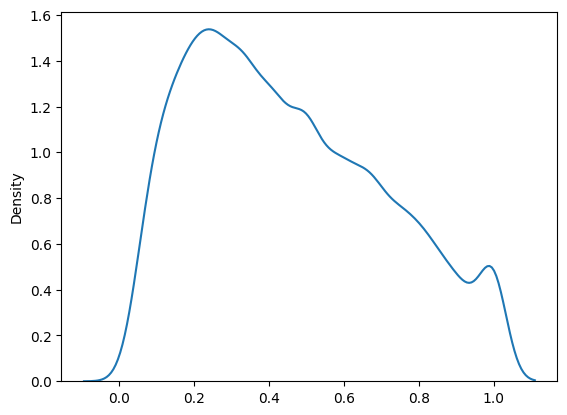

In [186]:
sns.kdeplot(ratios) 

In [187]:
# Get

<Axes: ylabel='Count'>

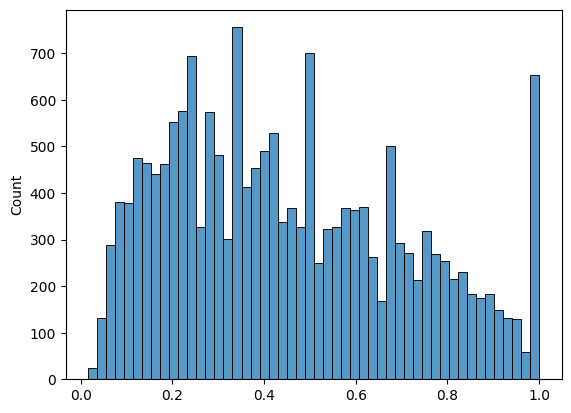

In [188]:
sns.histplot(ratios, bins=50)

<Axes: ylabel='Count'>

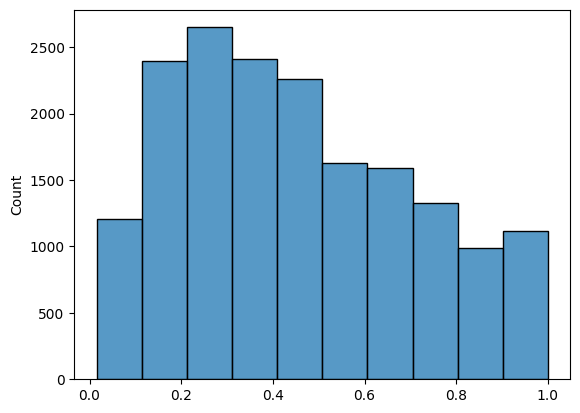

In [189]:
sns.histplot(ratios, bins=10)

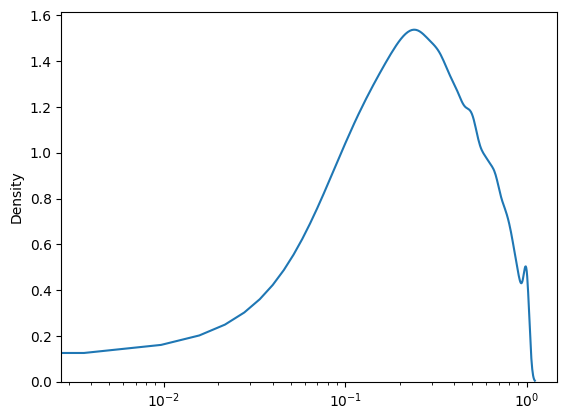

In [190]:
sns.kdeplot(ratios) 

# change scale to log
plt.xscale("log")

In [191]:
# Get value counts of ratios
import pandas as pd
df = pd.DataFrame(ratios, columns=["ratio"])
df["ratio"].value_counts()

0.500000    672
1.000000    630
0.333333    590
0.250000    454
0.200000    377
           ... 
0.068493      1
0.362319      1
0.081081      1
0.471545      1
0.893939      1
Name: ratio, Length: 1707, dtype: int64

### Testing tensor indexing

In [192]:
import torch 
x = torch.tensor([0, 1, 2, 3, 4, 5])
indexes = torch.tensor([0, 1, 2, 4])
x

tensor([0, 1, 2, 3, 4, 5])

In [193]:
x[indexes]

tensor([0, 1, 2, 4])

In [194]:
out_of_order_indexes = torch.tensor([4, 2, 1, 0, 5, 5, 2])
x[out_of_order_indexes]

tensor([4, 2, 1, 0, 5, 5, 2])

#### Get all downloaded uniprot IDs to create dataset

In [195]:
from phosphosite import PHOSPHOSITE_PREDICT_DIR
root_dir = PHOSPHOSITE_PREDICT_DIR / "protein_graph_dataset"


import glob 
extension = "pdb"  # "pt"
which_dir = "raw" # "processed"
query = str(root_dir / which_dir / "*.{extension}".format(extension=extension))
downloaded_fns = glob.glob(query)
uniprot_ids = [Path(a).stem for a in downloaded_fns]
len(uniprot_ids)

17223

#### Load dataset with `y_list` included

In [196]:
from phosphosite.ml.dataset import PhosphoGraphDataset

#uniprot_ids = uniprot_ids[0:10]
ds = PhosphoGraphDataset(
    root=root_dir,
    uniprot_ids=uniprot_ids, 
    y_label_map=indexes_dict,
)

In [197]:
ds.data

/home/cim/anaconda3/envs/phosphosite_ml/lib/python3.9/site-packages/torch_geometric/data/in_memory_dataset.py:157: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


Data(x=[7095, 1024], edge_index=[2, 2549], node_id=[10], b_factor=[7095], name=[10], num_nodes=7095)

In [198]:
len(ds.uniprot_ids)

17223

### Alternate dataset modified from `compot` 

This dataset is an alternate to the above `InMemoryDataset`-inheriting class.  


This `PhosphositeGraphDataset` class loads from disk and adds the `y` and `y_index` attributes to the data object which corresponds to the binary labels (phosphosite or unsite), and the indexes of nodes that have these labels; respectively. 

#### Setup

Load config objects etc.

In [199]:
from graphein.ml import ProteinGraphDataset
from pathlib import Path
import torch

from tqdm import tqdm

In [200]:
from graphein.protein.config import ProteinGraphConfig
from graphein.protein.edges.distance import add_distance_threshold

from functools import partial

long_interaction_threshold = 5 # seq positions 
edge_threshold_distance = 6.0 # Å
new_edge_funcs = {"edge_construction_functions": [
    partial(
    add_distance_threshold, long_interaction_threshold=long_interaction_threshold, threshold=edge_threshold_distance)
]}
config = ProteinGraphConfig(
    granularity="CA",
    **new_edge_funcs,
)

from graphein.ml.conversion import GraphFormatConvertor

columns = [
    "b_factor",
    "name",
    "edge_index",
    "x", # T5 per-residue embedding
]
convertor = GraphFormatConvertor(
    src_format="nx", dst_format="pyg", verbose="gnn",
    columns=columns,
)

# List of functions that consume a nx.Graph and return a nx.Graph. Applied to graphs after construction but before conversion to pyg
from phosphosite.graphs.pyg import add_per_residue_embedding
graph_transforms = [
    add_per_residue_embedding,
]

# TODO: copy across code that adds the residue embedding from `compot`. 

In [201]:
from phosphosite import PHOSPHOSITE_PREDICT_DIR
root_dir =  PHOSPHOSITE_PREDICT_DIR / "protein_graph_dataset"

In [202]:
all_ids = list(psp.index)
processed_filenames = [Path(a).stem for a in glob.glob(str(root_dir / "processed" / "*.pt"))]
downloaded_filenames = [Path(a).stem for a in glob.glob(str(root_dir / "raw" / "*.pdb"))]


uniprot_ids = [a for a in all_ids if a in processed_filenames]
len(all_ids), len(downloaded_filenames), len(processed_filenames), len(uniprot_ids)

(17585, 17223, 17067, 17063)

In [203]:
uniprot_ids_downloaded = [a for a in all_ids if a in downloaded_filenames]
len(uniprot_ids_downloaded)

17222

In [204]:
for u in uniprot_ids_downloaded: 
    d = indexes_dict[u]
    continue

In [205]:
root_dir 

PosixPath('/home/cim/STRUCTURAL_MOTIFS/phosphosite/notebooks/phosphosite_prediction/protein_graph_dataset')

In [206]:
with open(root_dir / "valid_uniprot_ids.txt", "r") as f:
    valid_uniprot_ids = f.read().splitlines()

not_valid = [a for a in uniprot_ids_downloaded if a not in valid_uniprot_ids]
len(not_valid), len(uniprot_ids_downloaded)

(17173, 17222)

In [207]:
len(processed_filenames)

17067

In [208]:
not_yet_processed = [a for a in uniprot_ids_downloaded if a not in processed_filenames]
len(not_yet_processed)

159

In [209]:
from phosphosite.ml.graph_dataset import PhosphositeGraphDataset 
kwargs = dict(
    root=root_dir,
    graphein_config=config, 
    graph_transformation_funcs=graph_transforms,
    graph_format_convertor=convertor,
    pre_transform=None, # before saved to disk , after PyG conversion 
    pre_filter=None,    # whether it will be in final dataset
)

# Attempt to load the graphs that failed.
start = 50
n = 100
ds = PhosphositeGraphDataset(
    uniprot_ids=not_yet_processed[0:5],
    #uniprot_ids=not_valid[start:start+n],
    y_label_map=indexes_dict,
    **kwargs,
)
ds

Processing...


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.39s/it]

failed to convert graph None
failed to convert graph None
failed to convert graph None
failed to convert graph None
failed to convert graph None



Done!


PhosphositeGraphDataset()

### Dataset Actual

In [210]:
# Load in the actual dataset (i.e. processed filenames)
ds = PhosphositeGraphDataset(
    uniprot_ids=processed_filenames,
    y_label_map=indexes_dict,
    **kwargs,
)

In [211]:
ds[0].y_index

tensor([ 345,  429,  430,  719,  789,  884,  899,  900,  917,  930, 1219,  340,
         344,  396,  400,  516,  974, 1123, 1126, 1135,  354, 1193, 1124, 1290,
        1295, 1250, 1129, 1163,  198, 1051,  659,  651,  621,  184,  542,  351,
         415,  145,  508,  448,  383,  372,  154,  992,   60,   59,  287,  523,
        1067,  538,  968,  366,  369, 1054])

In [212]:
ds[0].y

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### Number of failed graphs

In [213]:
processed_filenames = [Path(a).stem for a in glob.glob(str(root_dir / "processed" / "*.pt"))]
not_yet_processed = [a for a in uniprot_ids_downloaded if a not in processed_filenames]
len(not_yet_processed)

159

In [214]:
len(processed_filenames), ds

(17067, PhosphositeGraphDataset(17067))

### Construct dataloaders

In [215]:
from phosphosite.ml import get_dataloader_split
train_loader, valid_loader, test_loader = get_dataloader_split(ds, batch_size=8, train_batch_size=8)
len(train_loader), len(valid_loader), len(test_loader)

(1365, 342, 427)

In [216]:
batch = next(iter(train_loader))
batch

DataBatch(x=[4883, 1024], edge_index=[2, 1220], node_id=[8], b_factor=[4883], name=[8], num_nodes=4883, y_index=[218], y=[218], batch=[4883], ptr=[9])

In [217]:
batch.y_index

tensor([ 260,  351,  409,  642,  813,  816,  819,  124,  353,  558,   39,  681,
         780,  335,  580,  831,  757,  805,  825,   65,  571,  527,  782,  223,
         763,  230,  370, 1153, 1172, 1192, 1233, 1235, 1251, 1269, 1304, 1392,
        1405, 1408, 1445, 1451, 1529, 1530, 1531, 1532, 1556, 1596, 1665, 1703,
        1740, 1854, 1856, 1859, 1860, 1914, 1915, 1248, 1249, 1264, 1391, 1407,
        1697, 1718, 1729, 1813, 1851, 1918, 1924, 1002, 1005, 1147, 2144, 2107,
        1167, 1180,  950,  963, 2080,  951, 1890, 2083, 1958, 2014, 1780, 2181,
        2188, 2231, 2255, 2234, 2232, 2242, 2620, 2528, 2504, 2391, 2586, 2287,
        2482, 2629, 2645, 2578, 3007, 3032, 3111, 3147, 3150, 3156, 3198, 3221,
        3247, 3258, 3439, 3447, 3614, 2805, 3114, 3180, 3269, 3414, 2827, 2830,
        2930, 2943, 2949, 3008, 3025, 3031, 3055, 3190, 2986, 3406, 3210, 3048,
        3562, 3575, 3052, 3013, 2990, 2968, 3211, 3427, 2992, 2977, 2945, 3625,
        3711, 3715, 3806, 3825, 3826, 38

In [218]:
batch.y

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])

In [227]:
"mask" in batch

False

In [219]:
# index batch.y_index where batch.y == 1 
batch.y_index[batch.y == 0]

tensor([ 780,  335,  580,  831,  757,  805,  825,   65,  571,  527,  782,  223,
         763,  230,  370, 2144, 2107, 1167, 1180,  950,  963, 2080,  951, 1890,
        2083, 1958, 2014, 1780, 2242, 2504, 2391, 2586, 2287, 2482, 2629, 2645,
        2578, 2986, 3406, 3210, 3048, 3562, 3575, 3052, 3013, 2990, 2968, 3211,
        3427, 2992, 2977, 2945, 3796, 3759, 3626, 3773, 3669, 4204, 4121, 4323,
        4128, 4112, 4266, 4364, 4334, 4299, 4825, 4491, 4425, 4750, 4479, 4468,
        4869, 4769, 4619, 4467, 4482, 4604])

### Test batch on model forward pass

In [220]:
from phosphosite.model import PhosphoGAT

model = PhosphoGAT()
model.eval()

batch = next(iter(train_loader))
y_hat = model(batch)
y = batch.y 

In [221]:
y_hat, y

(tensor([[0.4934],
         [0.4947],
         [0.4691],
         ...,
         [0.5159],
         [0.5262],
         [0.5400]], grad_fn=<SigmoidBackward0>),
 tensor([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
         1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]))

In [222]:
y.shape

torch.Size([152])

In [223]:
# turn y_hat into int
y_hat = torch.argmax(y_hat, dim=1)
y_hat.shape

torch.Size([3015])

In [225]:
y_hat.sum(), y.sum()

(tensor(0), tensor(67.))

### Test masked loss function with `y_index`

In [232]:
batch

DataBatch(x=[3015, 1024], edge_index=[2, 1188], node_id=[8], b_factor=[3015], name=[8], num_nodes=3015, y_index=[152], y=[152], batch=[3015], ptr=[9])

In [235]:
from phosphosite.ml import MaskedBinaryCrossEntropy, calculate_masked_accuracy
accuracy = calculate_masked_accuracy

y = batch.y 
y_index = batch.y_index
y_hat = model(batch)


loss_func = MaskedBinaryCrossEntropy()

# Use `y_index` to create mask 
mask = torch.zeros_like(y_hat)
mask[y_index] = 1
mask



tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]])

In [237]:
mask.sum(), len(y_index), sum()

(tensor(151.), 152)

In [244]:
# mask values where > 0 
len(mask[mask > 0]) 

151

In [247]:
y_index.shape, y_index.unique().shape

(torch.Size([152]), torch.Size([151]))

In [254]:
# find duplicates 
# find value counts of y_index
import pandas as pd
df = pd.DataFrame(y_index, columns=["y_index"])

# show value counts where > 1
counts = df["y_index"].value_counts()
counts[counts > 1]

984    2
Name: y_index, dtype: int64

In [256]:
mask[984]

tensor([1.])

In [258]:
y_index.index(984)

AttributeError: 'Tensor' object has no attribute 'index'

In [260]:
# Find the index of the value 984 in y_index
y_index.tolist().index(984)

42

In [265]:
n = 42
y_index[n:n+2]

tensor([984, 984])

In [266]:
y[n:n+2]

tensor([1., 1.])